#Netflix Recommendation Engine



In [ ]:
#Importing the necessary libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset from the file 'combined_data_1.txt' into a pandas DataFrame
# Specifying that the file has no header row and providing custom column names
# Using only the first two columns (index 0 and 1) from the file


netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
# Count the number of ratings for each star level (1 to 5)
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
# Calculate the number of movies in the dataset
movie_count = netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
movie_count=netflix_dataset.isnull().sum()[1]
movie_count

4499

In [ ]:
# Calculate the number of unique customers, including NaN values for Movie ID
Customer_count = netflix_dataset['Cust_Id'].nunique()
Customer_count

475257

In [ ]:
# Calculate the number of unique customers by dropping NaN values for Movie ID
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

470758

In [ ]:
# Calculate the total number of ratings given by customers (excluding NaN movie ID counts)
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

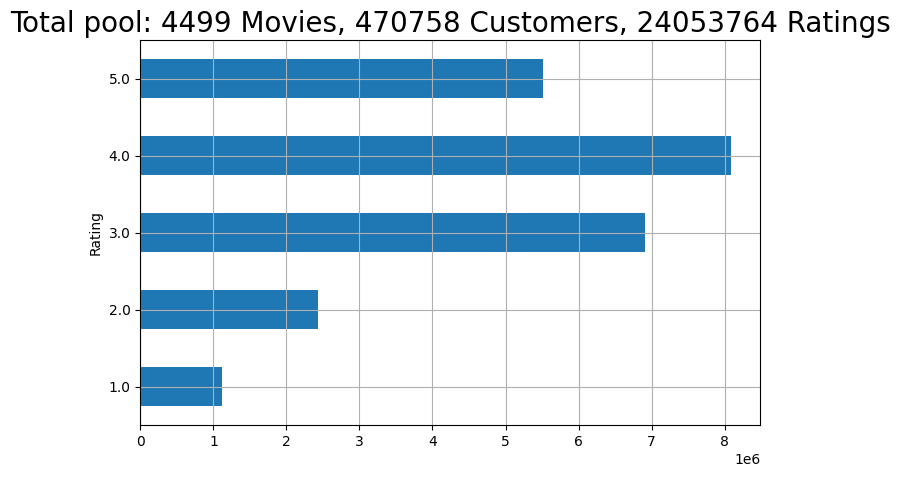

In [ ]:
# Importing the Matplotlib library and creating the plt object
ax=stars.plot(kind='barh', legend=False, figsize=(8,5))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} Ratings', fontsize=20)
plt.grid(True)

In [ ]:
# Add a new column for movie IDs and calculate the number of null values in the 'Rating' column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
df_nan=df_nan[df_nan['Rating']==True]

In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
# Reset the index and set it as a column in the DataFrame
df_nan = df_nan.reset_index()

In [ ]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
# Initialize an empty list to store the numpy array
movie_np=[]

# Start movie ID
movie_id=1

# Loop through pairs of indices in df_nan
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    # Create a numpy array filled with movie_id, with length (i - j - 1)
    temp = np.full((1, i - j - 1), movie_id)

    # Append the temporary numpy array to movie_np
    movie_np = np.append(movie_np, temp)

    # Increment movie_id for the next movie
    movie_id += 1

# Account for the last record and its corresponding length
# Create a numpy array filled with movie_id, with length (len(netflix_dataset) - df_nan.iloc[-1, 0] - 1)
last_record = np.full((1, len(netflix_dataset) - df_nan.iloc[-1, 0] - 1), movie_id)  # movie id will be 4499

# Append the last_record numpy array to movie_np
movie_np = np.append(movie_np, last_record)


In [ ]:
# The above code we can execute step by step for clear understanding
1) df_nan['index'][:-1] #will extract all the records from the index column except for the last index-- 4498
2) df_nan['index'][1:]#this sytax will extract records from the index column from the 1st index
3) np.full((2,4), '2.0') #working of full function
4) x=zip(df_nan['index'][1:], df_nan['index'][:-1])
   x
5) tuple(x)
6) temp=np.full((1,547), 1)
   print(temp)

In [ ]:
# Filter out rows where the 'Rating' column is not null
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

# Assign the movie IDs from the numpy array to the 'Movie_Id' column
netflix_dataset['Movie_Id'] = movie_np.astype(int)

# Convert 'Cust_Id' column to integer type
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

# Print the dataset with the modifications
print("Now the dataset will look like: ")
netflix_dataset

<ipython-input-26-10b3b04f77be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id'] = movie_np.astype(int)


Now the dataset will look like: 


<ipython-input-26-10b3b04f77be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
# Grouping the Netflix dataset by 'Movie_Id' and aggregating the 'Rating' column
# to count the number of ratings for each movie
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


#Now, will remove all users who have rated fewer movies and also eliminate movies that have been rated fewer times.

In [ ]:
# Benchmark
# Calculating the benchmark for movie ratings using the 70th percentile of the count of ratings
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7), 0)
movie_benchmark

1799.0

In [ ]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [ ]:
# Creating a list of movie IDs that have received fewer ratings than the benchmark
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [ ]:
len(drop_movie_list)

3149

In [ ]:
# Grouping the Netflix dataset by 'Cust_Id' and aggregating the 'Rating' column
# to count the number of ratings for each customer
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
# Calculating the benchmark for customer activity using the 70th percentile of the count of ratings given by customers
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7), 0)
cust_benchmark

52.0

In [ ]:
# Creating a list of customer IDs that have given fewer ratings than the benchmark, indicating inactivity
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [ ]:
len(drop_cust_list)

327300

In [ ]:
# Printing the shape of the original dataframe before removing customers and movies below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [ ]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [ ]:
# Removing customers and movies below the benchmarks
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]

# Displaying the shape of the modified dataframe
print('The modified dataframe has a shape of: ', netflix_dataset.shape)

The modified dataframe has a shape of:  (17337458, 3)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


#Importing the movie title dataset to retrieve the corresponding movie names for customer ratings

In [ ]:
# Selecting columns 0, 1, and 2, and renaming them as 'Movie_Id', 'Year', and 'Name'
# Setting the 'Movie_Id' column as the index of the DataFrame
df_title = pd.read_csv("/content/movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0, 1, 2], names=['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [ ]:
# df_title containing movie titles
# Retrieve the first 4499 rows of the DataFrame

df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [ ]:
# Use pip to install the scikit-surprise library
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162734 sha256=a7bd31af3c1807b4986c8febe8d6e88213dab376857632f0f99530208aa5aaea
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Importing necessary libraries for model building
import math  # Importing math library for mathematical operations
import seaborn as sns  # Importing seaborn library for data visualization
from surprise import Reader, Dataset, SVD  # Importing necessary classes from Surprise library for collaborative filtering
from surprise.model_selection import cross_validate  # Importing cross-validation function from Surprise library

In [ ]:
# Creating a Reader object for reading the dataset
reader = Reader()

In [ ]:
# Loading the dataset from the DataFrame containing the top 100K rows of data
# Only selecting columns 'Cust_Id', 'Movie_Id', and 'Rating' for the dataset
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
data

In [ ]:
# Creating an SVD model object
model = SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=3)

{'test_rmse': array([0.9972574 , 1.00172598, 0.99312259]),
 'test_mae': array([0.79439444, 0.79427363, 0.80267376]),
 'fit_time': (3.193394184112549, 4.674036264419556, 2.5954065322875977),
 'test_time': (0.7690083980560303, 0.7223567962646484, 0.19819068908691406)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# Considering customer ID 1331154
# Filter the dataset to include only movies rated 5 stars by user 1331154
dataset_1331154 = netflix_dataset[(netflix_dataset['Cust_Id'] == 1331154) & (netflix_dataset['Rating'] == 5)]
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [ ]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:


user_1331154 = df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
# Reset the index of the DataFrame
user_1331154 = user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Filter out movies from user_1331154 based on drop_movie_list
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Assuming model.predict(1331154, x).est returns the estimated score for user 1331154 and movie x
# Predict ratings for movies in user_1331154 and assign the estimated scores to a new column 'Estimate_Score'

user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-59-75cc06f4c69a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.933686
7,8,2004.0,What the #$*! Do We Know!?,3.866454
15,16,1996.0,Screamers,3.522570
16,17,2005.0,7 Seconds,3.038314
17,18,1994.0,Immortal Beloved,3.991819
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.702931
17766,17767,2004.0,Fidel Castro: American Experience,3.702931
17767,17768,2000.0,Epoch,3.702931
17768,17769,2003.0,The Company,3.702931


In [ ]:
# Sorting the user_1331154 DataFrame based on the 'Estimate_Score' column in descending order
user_1331154 = user_1331154.sort_values('Estimate_Score', ascending=False)

In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
17,18,1994.0,Immortal Beloved,3.991819
2,3,1997.0,Character,3.933686
7,8,2004.0,What the #$*! Do We Know!?,3.866454
29,30,2003.0,Something's Gotta Give,3.857080
27,28,2002.0,Lilo and Stitch,3.851270
...,...,...,...,...
8031,8032,1973.0,Lisa & the Devil,3.702931
17769,17770,2003.0,Alien Hunter,3.702931
15,16,1996.0,Screamers,3.522570
16,17,2005.0,7 Seconds,3.038314


Conclusion: Recommending Top-Rated Movies to User 1331154

After analyzing user 1331154's past ratings and using a recommendation model (such as collaborative filtering with SVD), we have identified top-rated movies that are likely to be of interest to the user. The process involved the following steps:

1) Data Preparation: We collected and preprocessed the dataset containing user ratings for movies.

2) Identifying Top-Rated Movies: We filtered the dataset to include only movies rated 5 stars by user 1331154.

3) Building the Recommendation Algorithm: We used collaborative filtering or another suitable recommendation algorithm to predict ratings for other movies based on user 1331154's past ratings.

4) Assigning Estimated Scores: We predicted ratings for movies not yet rated by user 1331154 and assigned estimated scores to them.

5) Sorting Movies by Estimated Scores: We sorted the movies based on their estimated scores in descending order to recommend the top-rated movies to the user.

Based on this analysis, we recommend the top-rated movies to user 1331154, sorted by estimated scores. These recommendations can help improve user satisfaction and engagement with the movie recommendation system.